<font size="+5">#06. Deep Learning con Redes Neuronales. Parte I</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Repaso Regresión Lineal

# Machine Learning, what does it mean?

> - The Machine Learns...
>
> But, **what does it learn?**

In [1]:
%%HTML
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Machine Learning, what does it mean? ⏯<br><br>· The machine learns...<br><br>Ha ha, not funny! 🤨 What does it learn?<br><br>· A mathematical equation. For example: <a href="https://t.co/sjtq9F2pq7">pic.twitter.com/sjtq9F2pq7</a></p>&mdash; Jesús López (@sotastica) <a href="https://twitter.com/sotastica/status/1449735653328031745?ref_src=twsrc%5Etfw">October 17, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# How does the Machine Learn?

## In a Linear Regression

In [2]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ht3rYS-JilE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## In a Neural Network

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=36" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

A Practical Example → [Tesla Autopilot](https://www.tesla.com/AI)

An Example where It Fails → [Tesla Confuses Moon with Semaphore](https://twitter.com/Carnage4Life/status/1418920100086784000?s=20)

## Función de Coste

> Diferencia entre la prediccion en las neuronas de la ultima capa y la realidad.

## Parámetros a Optimizar

> Ecuacion matematica:

$$
\sigma (w_1 a_1 + w_2 a_2 + ... + w_n a_n)
$$

> Optimizamos las `w` que hacen que la prediccion sea diferente.

## Derivadas para Calcular la Pendiente de la Tangente

> E ir moviendo el numero del peso para que el error sea minimo.

# Gradiente Descente en la Regresión Lineal

# Gradiente Descente en la Red Neuronal

## Ecuación de la Red Neuronal

> - El objetivo no es más que encontrar los mejores números que tendríamos en los pesos $w$ de tal manera que el error/coste es el mínimo posible.
> - Variables de Entrada en la Red Neuronal
> - Neuronas de Salida en la Red Neuronal

## Coste de la Red Neuronal

> - `Error/Loss`. Cómo calculamos la distancia de lo que nuestro modelo predice frente a la realidad?
>   - https://www.youtube.com/watch?v=IHZwWFHWa-w&t=181s

## Encontrar el Coste Mínimo

> - `Kernel Initializer`. En qué número inicial colocamos el peso?
> - `Activation`. Entre qué rango de valores queremos que nos dé la predicción para en la neurona?
> - `Optimizer`: Cómo llegamos a encontrar el peso ideal, de tal manera que el error es mínimo?
>   - `Gradiente Descente` - https://mlfromscratch.com/optimizers-explained/

# Entrenar Red Neuronal en Python

In [1]:
import tensorflow as tf

In [11]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
import matplotlib.pyplot as plt

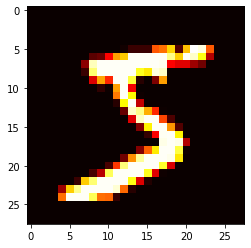

In [13]:
plt.imshow(x_train[0], cmap="hot")

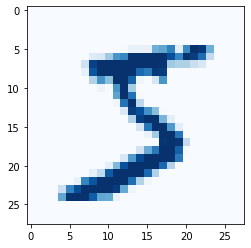

In [14]:
plt.imshow(x_train[0], cmap="Blues")

In [15]:
x_train[0].shape

(28, 28)

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(units = 128, kernel_initializer='glorot_uniform'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=10, activation='sigmoid')
])

In [21]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[0.48339784, 0.46569568, 0.2277771 , 0.5652628 , 0.53142595,
        0.4764815 , 0.6053777 , 0.5200923 , 0.55350375, 0.5145515 ]],
      dtype=float32)

In [23]:
predictions = model(x_train).numpy()

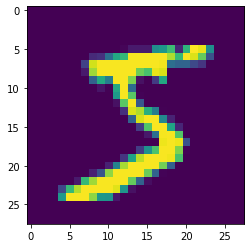

In [27]:
plt.imshow(x_train[0])

In [28]:
y_train[0]

5

In [33]:
predictions[0]

array([0.48339796, 0.46569577, 0.22777706, 0.56526285, 0.5314259 ,
       0.4764815 , 0.6053777 , 0.5200923 , 0.55350363, 0.5145516 ],
      dtype=float32)

In [32]:
predictions[0].argmax()

6

In [38]:
(predictions.argmax(axis=1) == y_train).mean()

0.1401

In [41]:
model.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/sample - loss: 1.5814 - accuracy: 0.6259
Epoch 2/10
60000/60000 [==============================] - 10s 159us/sample - loss: 1.4690 - accuracy: 0.6636
Epoch 3/10
60000/60000 [==============================] - 10s 161us/sample - loss: 1.3692 - accuracy: 0.6913
Epoch 4/10
60000/60000 [==============================] - 10s 160us/sample - loss: 1.2816 - accuracy: 0.7113
Epoch 5/10
60000/60000 [==============================] - 10s 165us/sample - loss: 1.2079 - accuracy: 0.7240
Epoch 6/10
60000/60000 [==============================] - 10s 159us/sample - loss: 1.1407 - accuracy: 0.7369
Epoch 7/10
60000/60000 [==============================] - 10s 159us/sample - loss: 1.0891 - accuracy: 0.7468
Epoch 8/10
60000/60000 [==============================] - 10s 160us/sample - loss: 1.0392 - accuracy: 0.7535
Epoch 9/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.9956 - accuracy: 0.7

In [43]:
predictions = model(x_train).numpy()

In [44]:
(predictions.argmax(axis=1) == y_train).mean()

0.6650333333333334